# Data Preparation - Coaches

In [31]:
import pandas as pd
from data_prep_helpers import *
from scipy.stats import zscore


df = pd.read_csv('../data/coaches.csv')
df.head()

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,WNBA,0,17,17,1,2
1,adubari99w,1,NYL,WNBA,0,20,12,4,3
2,adubari99w,2,NYL,WNBA,0,21,11,3,3
3,adubari99w,3,NYL,WNBA,0,18,14,4,4
4,adubari99w,4,NYL,WNBA,0,16,18,0,0


## Data Cleaning

### Dealing with Missing Values / Features

<Axes: title={'center': 'Number of null values per column'}>

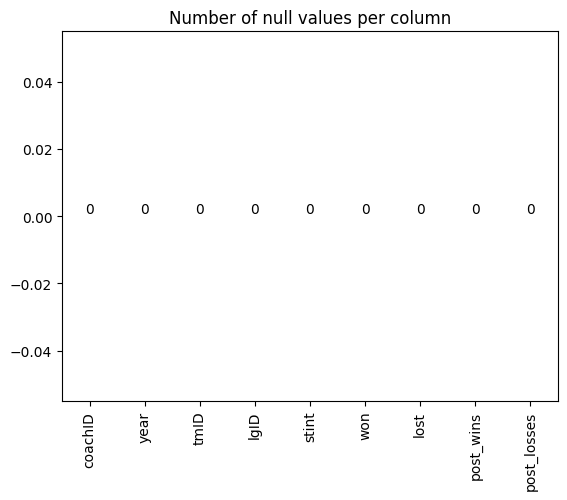

In [32]:
nulls_values_by_column(df)

### Dealing with Duplicate values / Redundant Data

<Axes: title={'center': 'Number of Unique Values Per Column'}>

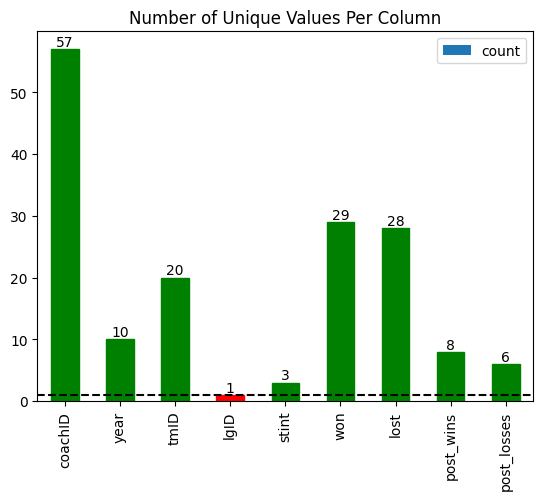

In [33]:
unique_values_by_column(df, 1)

In [34]:
num_columns = len(df.columns)
df = filter_column_uniques(df, 1)
print(f"Removed {num_columns - len(df.columns)} columns that had only one unique value")

Removed 1 columns that had only one unique value


In [35]:
num_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {num_rows - df.shape[0]} repeated rows")

Removed 0 repeated rows


### Outliers and Noise

#### Detecting and Removing Outliers using ...

#### ... z-score

This is a simple way to detect outliers using the z-score. The z-score is the number of standard deviations away from the mean a data point is. If the absolute value of the z-score is greater than 3, we can flag this data point as an outlier.

Let's take a look at the z-score range using a histogram plot.

<module 'matplotlib.pyplot' from '/home/daniel/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

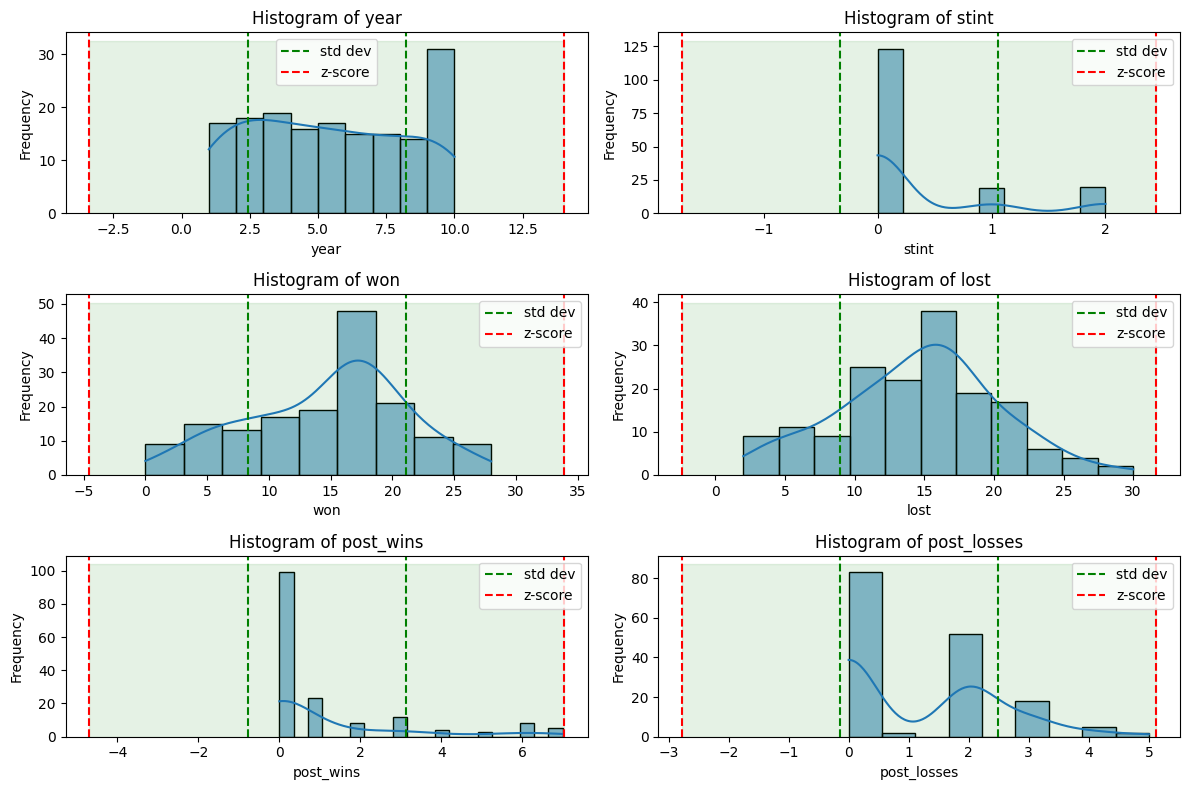

In [36]:
max_zscore = 3
histogram_plot(df, max_zscore)

Now let's use the z-score to detect and remove outliers from the dataset.

In [37]:
num_rows = df.shape[0]
df = filter_by_zscore(df, max_zscore)
print(f"Removed {num_rows - df.shape[0]} rows with zscore > {threshold}")

Removed 0 rows with zscore > 3


#### ... Interquartile Range (IQR)

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The IQR may also be called the midspread or middle 50%. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

Let's take a look at the IQR range using a histogram plot.

<module 'matplotlib.pyplot' from '/home/daniel/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

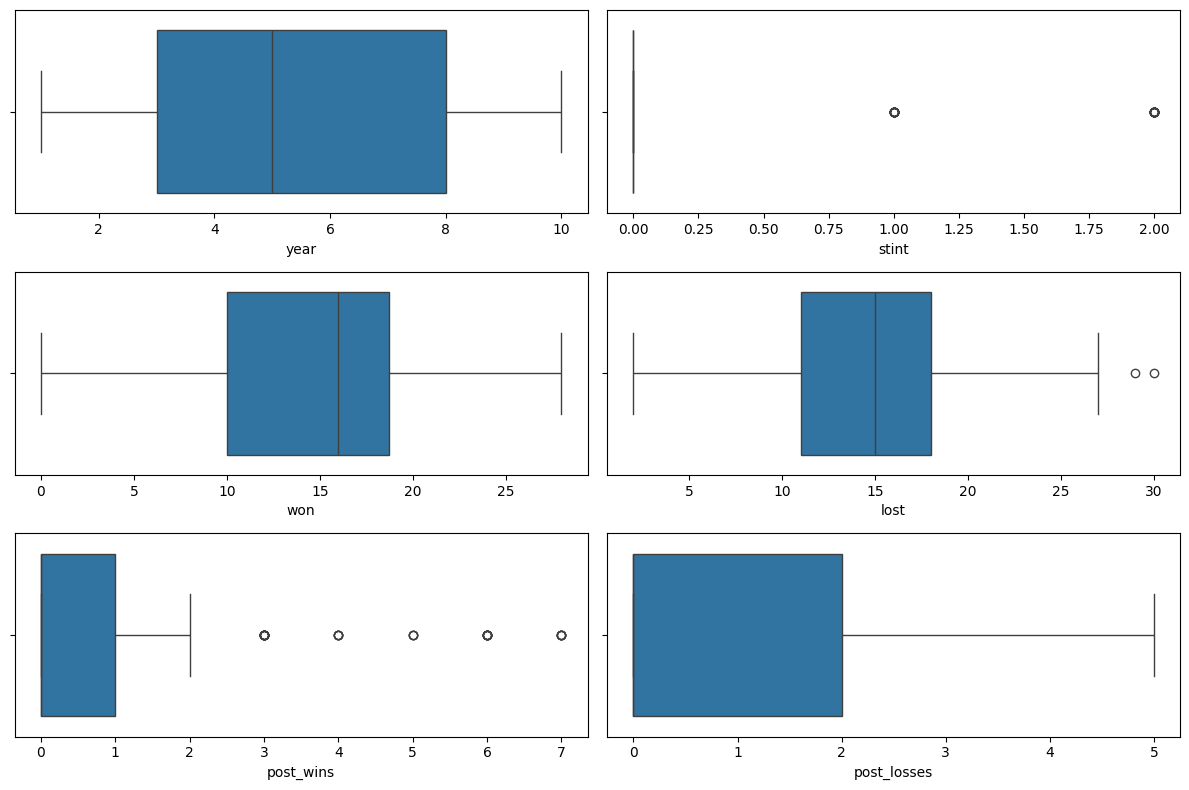

In [38]:
factor = 1.5
iqr_plot(df)

Now let's use the IQR to detect and remove outliers from the dataset.

In [39]:
num_rows = df.shape[0]
df = filter_by_iqr(df, factor)
print(f"Removed {num_rows - df.shape[0]} rows with factor = {factor}")

Removed 70 rows with factor = 1.5


### Dealing with Inconsistent / Conflicting Data 